## This notebook will be mainly used for the capstone project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-26 09:50:58--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  32.1MB/s   in 2.2s   

2020-09-26 09:51:01 (32.1 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [4]:
df = pd.read_csv('Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Exploring the data

In [5]:
df.head()

SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  ... ROADCOND                LIGHTCOND  \
0  Matched  Intersection  37475.0  ...      Wet                 Daylight   
1  Matched         Block      NaN  ...      Wet  Dark - Street Lights On   
2  Matched         Block      NaN  ...      Dry                 Daylight   
3  Matched         Block      NaN  ...      Dry                 Daylight   
4  Matched  Intersection  34387.0  ...      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN      NaN         10   
1           NaN   6354039.0      NaN         11   
2           NaN   4323031.0      NaN         32   
3           NaN         NaN      NaN         23   
4           NaN   4028032.0      NaN         10   

                                          ST_COLDESC  SEGLANEKEY  \
0                                  Entering at angle           0   
1  From same direction - both going straight - bo...           0   
2                             One parked--one moving           0   
3                   From same direction - all others           0   
4                                  Entering at angle           0   

   CROSSWALKKEY  HITPARKEDCAR  
0             0             N  
1             0             N  
2             0             N  
3             0             N  
4             0             N  

[5 rows x 38 columns]

Text(0.5, 1.0, 'SEVERITY COUNT')

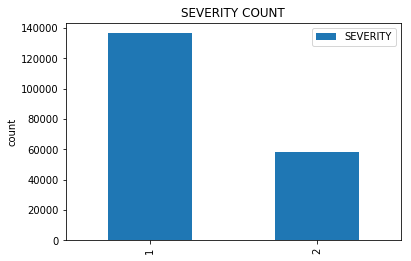

In [6]:
df['SEVERITYCODE'].value_counts().plot(kind='bar', label='SEVERITY')
plt.legend()
plt.ylabel('count')
plt.title('SEVERITY COUNT')

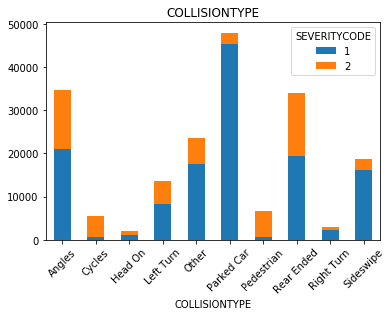

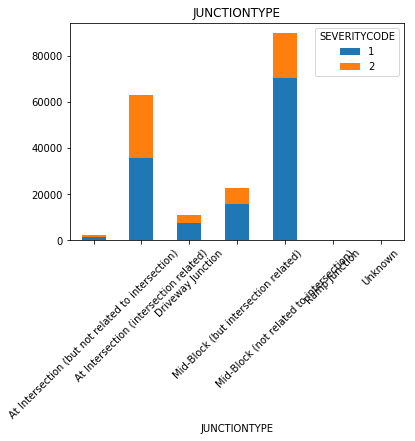

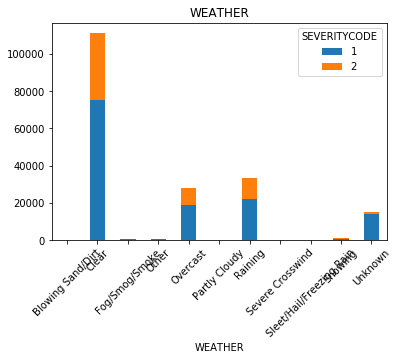

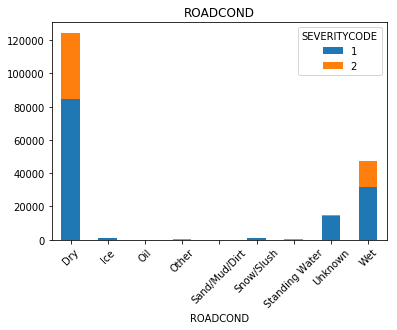

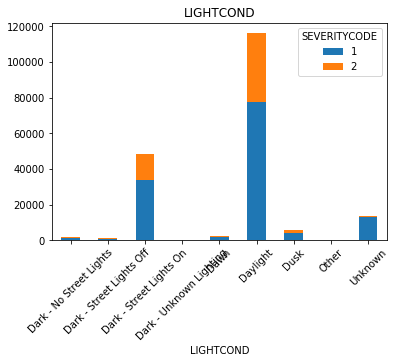

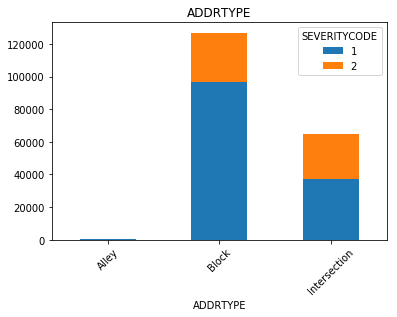

In [7]:
for field in ['COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE']:
    df.groupby([field, 'SEVERITYCODE'])['SEVERITYCODE'].count().unstack('SEVERITYCODE').plot(kind='bar', stacked=True)
    plt.title(field)
    plt.xticks(rotation=45)
    

# drop irrelevant columns

In [8]:
columns_to_drop = ['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'INTKEY', 'LOCATION', 'ST_COLDESC', 'SEVERITYDESC', 'SEVERITYCODE.1',
                   'INCDATE', 'INCDTTM', 'SDOT_COLCODE', 'ST_COLCODE', 'SDOT_COLDESC', 'SDOTCOLNUM', 'SEGLANEKEY', 'CROSSWALKKEY', 'EXCEPTRSNCODE',
                   'EXCEPTRSNDESC', 'HITPARKEDCAR', 'COLLISIONTYPE', 'JUNCTIONTYPE']
df.drop(columns_to_drop, axis = 1,inplace=True)

# fill missing data and convert to numeric

In [9]:
for field in ['INATTENTIONIND', 'PEDROWNOTGRNT', 'SPEEDING', 'UNDERINFL']:
    df[field] = df[field].replace({'1': 1, 'Y': 1, np.nan: 0, '0': 0, 'N': 0}).astype(int)

In [10]:
df['STATUS'] = df['STATUS'].replace({'Matched': 1, 'Unmatched': 0})

# reomve rows with missing data

In [11]:
columns_with_nans = ['WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE']
for field in columns_with_nans:
    df[field] = df[field].replace({'Unknown': np.nan, 'Other': np.nan})
df.dropna(subset=columns_with_nans, axis=0, inplace=True)
# for field in:
#     print(field + ': ' + ', '.join(df[field].unique()))

# One Hot Encoding

In [12]:
df.head()

SEVERITYCODE  STATUS      ADDRTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  \
0             2       1  Intersection            2         0            0   
1             1       1         Block            2         0            0   
2             1       1         Block            4         0            0   
3             1       1         Block            3         0            0   
4             2       1  Intersection            2         0            0   

   VEHCOUNT  INATTENTIONIND  UNDERINFL   WEATHER ROADCOND  \
0         2               0          0  Overcast      Wet   
1         2               0          0   Raining      Wet   
2         3               0          0  Overcast      Dry   
3         3               0          0     Clear      Dry   
4         2               0          0   Raining      Wet   

                 LIGHTCOND  PEDROWNOTGRNT  SPEEDING  
0                 Daylight              0         0  
1  Dark - Street Lights On              0         0  
2                 Daylight              0         0  
3                 Daylight              0         0  
4                 Daylight              0         0

In [13]:
df['SEVERITYCODE'].value_counts()

1    113705
2     55542
Name: SEVERITYCODE, dtype: int64

In [14]:
for field in columns_with_nans:
    df = pd.concat([df, pd.get_dummies(df[field])], axis=1)
df.drop(columns=columns_with_nans, inplace=True)

In [15]:
df.dtypes

SEVERITYCODE                int64
STATUS                      int64
PERSONCOUNT                 int64
PEDCOUNT                    int64
PEDCYLCOUNT                 int64
VEHCOUNT                    int64
INATTENTIONIND              int64
UNDERINFL                   int64
PEDROWNOTGRNT               int64
SPEEDING                    int64
Blowing Sand/Dirt           uint8
Clear                       uint8
Fog/Smog/Smoke              uint8
Overcast                    uint8
Partly Cloudy               uint8
Raining                     uint8
Severe Crosswind            uint8
Sleet/Hail/Freezing Rain    uint8
Snowing                     uint8
Dry                         uint8
Ice                         uint8
Oil                         uint8
Sand/Mud/Dirt               uint8
Snow/Slush                  uint8
Standing Water              uint8
Wet                         uint8
Dark - No Street Lights     uint8
Dark - Street Lights Off    uint8
Dark - Street Lights On     uint8
Dark - Unknown

# Normilize data

In [16]:
from sklearn import preprocessing
from matplotlib import pyplot as plt
Feature = df.drop(columns=['SEVERITYCODE'])
y = df['SEVERITYCODE'].values
X = preprocessing.StandardScaler().fit(Feature).transform(Feature)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
models = {}

# Classification

# K Nearest Neighbor(KNN)

100%|██████████| 9/9 [1:14:07<00:00, 495.94s/it]


[0.67754801 0.69952733 0.67465288 0.69137371 0.68298375 0.70384047
 0.69624815 0.71710487 0.70460857]


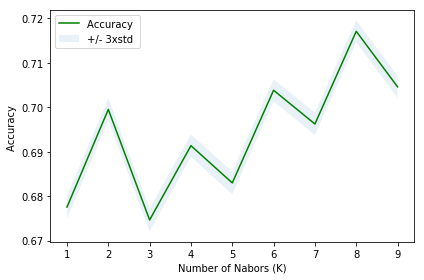

best K is 8, accuracy 0.7171048744460857


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from tqdm import tqdm
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
neighbors = {}
for n in tqdm(range(1,Ks)):
    
    #Train Model and Predict  
    neighbors[n] = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neighbors[n].predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
best_K = np.argmax(mean_acc) + 1
print('best K is {}, accuracy {}'.format(best_K, max(mean_acc)))
models['KNN'] = neighbors[best_K]

# Decision Tree

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.744146 to fit



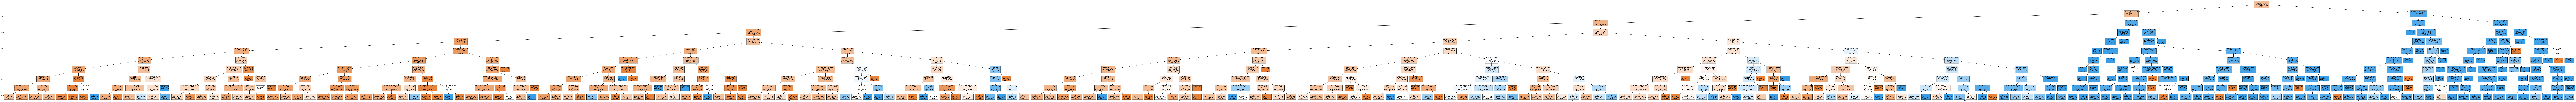

In [19]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
Tree.fit(X_train,y_train)
predTree = Tree.predict(X_test)
models['Decision Tree'] = Tree
!pip install pydotplus
import pydotplus
from sklearn.externals.six import StringIO
from sklearn import tree
import matplotlib.image as mpimg
dot_data = StringIO()
filename = "drugtree.png"
featureNames = Feature.columns
targetNames = df["SEVERITYCODE"].unique().tolist()
targetNames = [str(_) for _ in targetNames]
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train.astype(str)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(500, 100))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

In [20]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
models['SVM'] = clf

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
models['LogisticRegression'] = LR

# Model Evaluation using Test set

In [22]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [23]:
metrics = {'Jaccard': lambda y_true, y_pred: jaccard_similarity_score(y_true, y_pred),
          'F1-score': lambda y_true, y_pred: f1_score(y_pred, average='weighted'),
          'LogLoss': lambda y_true, y_pred: log_loss(y_true, y_pred)}
results = pd.DataFrame(index=['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'], columns=['Jaccard', 'F1-score', 'LogLoss'])
results.index.name = 'Algorithm'

In [24]:
for algorithm in ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression']:
    y_pred = models[algorithm].predict(X_test)
    results.at[algorithm, 'Jaccard'] = jaccard_similarity_score(y_test, y_pred)
    results.at[algorithm, 'F1-score'] = f1_score(y_test, y_pred, average='weighted')
    if algorithm == 'LogisticRegression':
        y_pred_prob = models[algorithm].predict_proba(X_test)
        results.at[algorithm, 'LogLoss'] = log_loss(y_test, y_pred_prob)
results.fillna('NA', inplace=True)
print(results)


                     Jaccard  F1-score   LogLoss
Algorithm                                       
KNN                 0.717105  0.673585        NA
Decision Tree       0.728922  0.679298        NA
SVM                 0.727326  0.667747        NA
LogisticRegression  0.726056  0.670279  0.559756
